In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls 'drive/My Drive/Early Warning Detection in production lines/wip'

data_key.json		Train_S16.csv  Train_S32.csv  Train_S45.csv
Keys16_07_20.ipynb	Train_S17.csv  Train_S33.csv  Train_S46.csv
Null_Percentage_R1.csv	Train_S18.csv  Train_S34.csv  Train_S47.csv
Test_Filter.csv		Train_S19.csv  Train_S35.csv  Train_S48.csv
test_ids.csv		Train_S1.csv   Train_S36.csv  Train_S49.csv
Train_Filter.csv	Train_S20.csv  Train_S37.csv  Train_S4.csv
Train_S0.csv		Train_S21.csv  Train_S38.csv  Train_S50.csv
Train_S10.csv		Train_S22.csv  Train_S39.csv  Train_S51.csv
Train_S11.csv		Train_S23.csv  Train_S40.csv  Train_S5.csv
Train_S12.csv		Train_S26.csv  Train_S41.csv  Train_S6.csv
Train_S13.csv		Train_S27.csv  Train_S42.csv  Train_S7.csv
Train_S14.csv		Train_S28.csv  Train_S43.csv  Train_S8.csv
Train_S15.csv		Train_S31.csv  Train_S44.csv  Train_S9.csv


In [ ]:
 ###Assign to the directory of interest
#  cd /content/drive/My Drive/Early Warning Detection in production lines/wip

In [ ]:
import json
import pandas as pd
import os

In [ ]:
with open('drive/My Drive/Early Warning Detection in production lines/wip/data_key.json') as f:
    data = json.load(f)

In [ ]:
import pandas as pd
import gc
import numpy as np

In [ ]:
null_data=pd.read_csv("drive/My Drive/Early Warning Detection in production lines/wip/Null_Percentage_R1.csv")

In [ ]:
null_data.columns

Index(['Column_Name', 'Null Percentage', 'Total (Null)', 'Unnamed: 3'], dtype='object')

In [ ]:
twenty_per_non_null = null_data[null_data['Null Percentage'] <= 0.8 ]

In [ ]:
import re
s= []
for i in null_data.iloc[:,0]:
    c = re.findall('_+(\w+)_',i)
    for j in c:
        s.append(j)

us = []
for i in s:
    if i not in us:
        us.append(i)


def get_columns(cc,us):
    d = {}
    for i in cc:
        c = re.findall('_+(\w+)_',i)
        for j in c:
            if j in us:
                d.setdefault(j, []).append(i)
    return d

twenty_not_null_keys = get_columns(twenty_per_non_null.iloc[:,0],us)

In [ ]:
len(list(twenty_not_null_keys.keys()))

17

In [ ]:
list(twenty_not_null_keys.keys())

['S0',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S26',
 'S29',
 'S30',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37']

In [ ]:
# ##Data preparation
# temp=pd.read_csv("drive/My Drive/Early Warning Detection in production lines/wip/Train_S0.csv")
# temp = temp.select_dtypes(exclude=['object'])
# temp = temp.loc[:,~(temp.columns.str.contains('_D'))]

In [ ]:
# temp_1=temp[temp.Response==1]
# temp_0=temp[temp.Response==0]

In [ ]:
# temp_0=temp_0.dropna(subset=data['S0'])

In [ ]:
# temp_1=temp_1.dropna(subset=data['S0'])

In [ ]:
# temp_1.shape

In [ ]:
# train_0=pd.DataFrame(temp_0.sample(n=30000,random_state=1))
# train_1=pd.DataFrame(temp_1.sample(n=3000,random_state=1))

In [ ]:
# train=pd.concat([train_0,train_1])

In [ ]:
# test_1=temp_1[~temp_1.Id.isin(train_1.Id.to_list())]
# test_0=pd.DataFrame(temp_0[~temp_0.Id.isin(train_0.Id.to_list())].sample(n=612,random_state=1))
# test=pd.concat([test_0,test_1])

In [ ]:
# test.to_csv("drive/My Drive/Early Warning Detection in production lines/wip/test_ids.csv",index=False)

In [ ]:
test=pd.read_csv("drive/My Drive/Early Warning Detection in production lines/wip/test_ids.csv")

In [ ]:
# temp=pd.read_csv("drive/My Drive/Early Warning Detection in production lines/wip/Train_S0.csv")
# temp=temp[~temp.Id.isin(test.Id.to_list())]
# temp_1=temp[temp.Response==1]
# temp_0=temp[temp.Response==0]
# temp_0=temp_0.dropna(subset=data['S0'])
# temp_1=temp_1.dropna(subset=data['S0'])
# train_0=pd.DataFrame(temp_0.sample(n=30000,random_state=1))
# train_1=pd.DataFrame(temp_1.sample(n=3000,random_state=1))
# train=pd.concat([train_0,train_1])
# train=pd.concat([train[['Id','Response']],train[twenty_not_null_keys['S0']]],axis=1)
# test=pd.concat([test[['Id','Response']],test[twenty_not_null_keys['S0']]],axis=1)

In [ ]:
temp=pd.read_csv("drive/My Drive/Early Warning Detection in production lines/wip/Train_S0.csv")
test=temp[temp.Id.isin(test.Id.to_list())]
temp=temp[~temp.Id.isin(test.Id.to_list())]
temp_1=temp[temp.Response==1]
temp_0=temp[temp.Response==0]
# temp_0=temp_0.dropna(subset=data['S6'])
temp_1=temp_1.dropna(subset=data['S0'])
train_0=pd.DataFrame(temp_0.sample(n=30000,random_state=1))
train_1=pd.DataFrame(temp_1.sample(n=3000,random_state=1))
train=pd.concat([train_0,train_1])
train=pd.concat([train[['Id','Response']],train[twenty_not_null_keys['S0']]],axis=1)
test=pd.concat([test[['Id','Response']],test[twenty_not_null_keys['S0']]],axis=1)
train = train.select_dtypes(exclude=['object'])
train = train.loc[:,~(train.columns.str.contains('_D'))]
test = test.select_dtypes(exclude=['object'])
test = test.loc[:,~(test.columns.str.contains('_D'))]

Statistical bins

In [ ]:
cols = train.columns.tolist()
cols = [e for e in cols if e not in ('Id', 'Response')]

# Specify number of quantiles for binning
n = 5
label_arr = list(range(1,n+1))
label_arr
edges = pd.DataFrame()

for i in cols:
  if train[i].nunique()>n:
    edges[i] = pd.qcut(train[i],q=n,retbins=True)[1]
  else:
    a=train[i].nunique()-1
    lst = [None] * (n-a)
    temp=pd.qcut(train[i],q=a,retbins=True)[1].tolist()
    temp.extend(lst)
    edges[i] = temp

edges

,L0_S0_F0,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F2,L0_S0_F20,L0_S0_F22,L0_S0_F4,L0_S0_F6,L0_S0_F8
0,-0.402,-0.566,-0.044,-0.232,-0.398,-0.388,-0.474,-0.341,-0.3410,-0.397,-0.416,-0.404
1,-0.062,-0.157,-0.015,-0.072,-0.102,-0.099,-0.071,-0.207,-0.2070,-0.197,-0.197,-0.056
2,-0.016,0.025,-0.007,-0.032,-0.031,-0.035,-0.019,-0.069,-0.0690,-0.161,-0.161,-0.013
3,0.023,0.070,0.000,0.008,0.025,0.029,0.026,0.066,0.0656,-0.015,-0.016,0.031
4,0.069,0.116,0.015,0.088,0.092,0.093,0.078,0.203,0.2030,0.294,0.294,0.074
5,0.265,0.206,0.089,0.488,0.484,0.468,0.280,0.651,0.6510,0.567,0.566,0.292


In [ ]:
# Bin train using the edges obtained from statistical binning

cols = train.columns.tolist()
cols = [e for e in cols if e not in ('Id', 'Response')]


for i in cols:
  edg_arr = edges[i].unique().tolist()

  edg_arr[0] = -float("inf")
  edg_arr[-1] = float("inf")
  # print(edg_arr)
  train[i] = pd.cut(train[i],bins=edg_arr, labels = False)

train.head()

,Id,Response,L0_S0_F0,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F2,L0_S0_F20,L0_S0_F22,L0_S0_F4,L0_S0_F6,L0_S0_F8
546211,1093211,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399962,800471,0,0.0,0.0,4.0,4.0,3.0,3.0,0.0,0.0,0.0,4.0,3.0,2.0
775675,1551994,0,4.0,1.0,0.0,0.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,0.0
55725,111560,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91060,182333,0,3.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,3.0,1.0


In [ ]:
cols = test.columns.tolist()
cols = [e for e in cols if e not in ('Id', 'Response')]


for i in cols:
  edg_arr = edges[i].unique().tolist()

  edg_arr[0] = -float("inf")
  edg_arr[-1] = float("inf")
  # print(edg_arr)
  test[i] = pd.cut(test[i],bins=edg_arr, labels = False)

In [ ]:
repeat_arr = [1,2,3,4,5]
groups=test.copy()
groups['v_sets'] = np.tile(repeat_arr, len(groups)//len(repeat_arr))

In [ ]:
# validation data set preparation 
test_sets = {}
print('------TEST SET-----')
for i in range(1,6):
  temp = groups.loc[groups['v_sets']==i]
  temp.drop(['v_sets'],axis=1,inplace=True)
  i = int(i)
  test_sets[i] = temp.copy()


------TEST SET-----


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_sets[1]

,Id,Response,L0_S0_F0,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F2,L0_S0_F20,L0_S0_F22,L0_S0_F4,L0_S0_F6,L0_S0_F8
2462,4961,0,3,0,0,0,1,0,4,4,4,1,1,0
6842,13598,0,1,4,2,1,0,0,1,0,0,0,0,4
11988,23897,1,2,2,2,2,1,3,2,1,1,3,3,4
19944,39960,0,0,2,4,4,0,0,0,3,3,2,2,4
24693,49474,1,3,3,0,0,2,2,3,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169485,2338960,1,4,0,0,0,3,2,4,4,4,3,2,4
1172865,2345648,0,1,2,1,1,3,4,1,0,0,0,0,2
1174460,2348808,1,2,4,4,4,3,4,1,3,3,4,4,2
1176793,2353387,0,1,4,3,3,0,2,1,3,3,2,2,1


In [ ]:
%%time
! pip install bnlearn
! pip install pgmpy
import bnlearn
from bnlearn.bnlearn import _dag2adjmat

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPU times: user 984 ms, sys: 191 ms, total: 1.18 s
Wall time: 7.95 s


In [ ]:
model_df = train.copy()
model_df.columns.tolist()[1:]

['Response',
 'L0_S0_F0',
 'L0_S0_F10',
 'L0_S0_F12',
 'L0_S0_F14',
 'L0_S0_F16',
 'L0_S0_F18',
 'L0_S0_F2',
 'L0_S0_F20',
 'L0_S0_F22',
 'L0_S0_F4',
 'L0_S0_F6',
 'L0_S0_F8']

[BNLEARN][STRUCTURE LEARNING] Warning: Computing DAG with 13 nodes can take a very long time!
[BNLEARN][STRUCTURE LEARNING] Computing best DAG using [hc]
[BNLEARN][STRUCTURE LEARNING] Set scoring type at [bic]
[BNLEARN][plot] Making plot based on BayesianModel


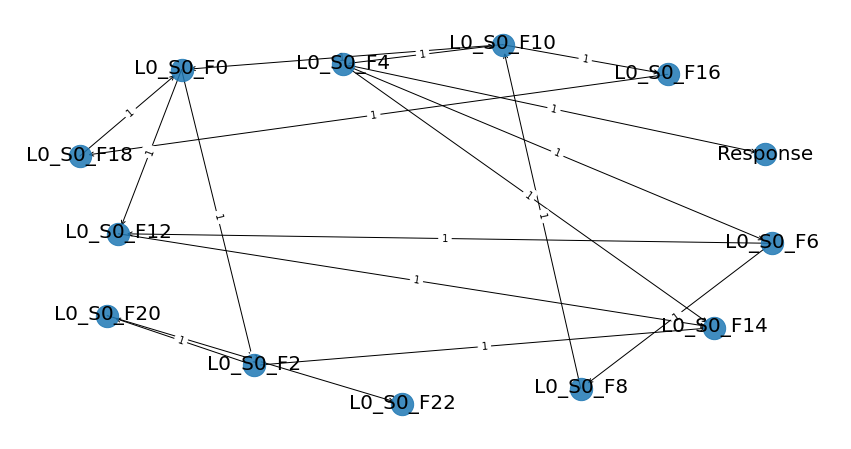

CPU times: user 20.7 s, sys: 282 ms, total: 21 s
Wall time: 20.8 s


In [ ]:
%%time
model_df = train.copy()
model_df=model_df[model_df.columns.tolist()[1:]]
model = bnlearn.structure_learning.fit(model_df, methodtype='hc', scoretype='bic')
bnlearn.plot(model)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[BNLEARN] Conversion of adjmat to BayesianModel.
CPD of L0_S0_F0:
+---------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| L0_S0_F10     | L0_S0_F10(0.0)      | L0_S0_F10(0.0)      | L0_S0_F10(0.0)      | L0_S0_F10(0.0)      | L0_S0_F10(0.0)      | L0_S0_F10(1.0)      | L0_S0_F10(1.0)      | L0_S0_F10(1.0)      | L0_S0_F10(1.0)      | L0_S0_F10(1.0)      | L0_S0_F10(2.0)      | L0_S0_F10(2.0)      | L0_S0_F10(2.0)      | L0

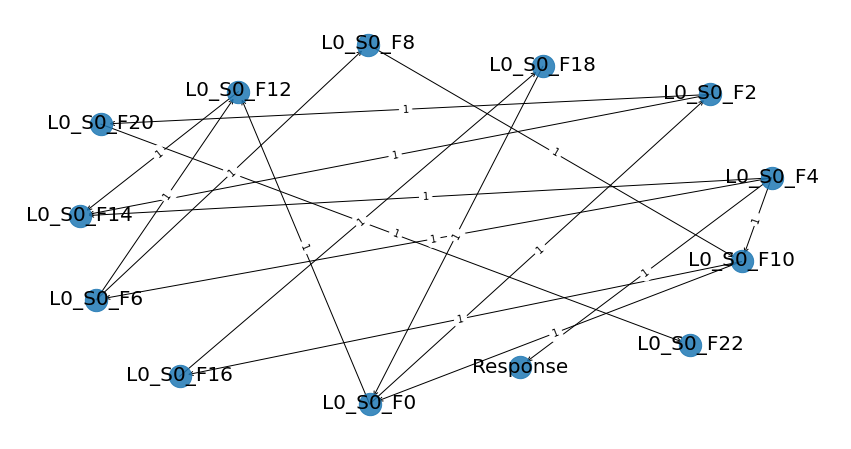

{'G': <networkx.classes.digraph.DiGraph at 0x7f8810fc2080>,
 'pos': {'L0_S0_F0': array([-0.12319358, -1.        ]),
  'L0_S0_F10': array([ 0.86269432, -0.22276348]),
  'L0_S0_F12': array([-0.47089311,  0.70360863]),
  'L0_S0_F14': array([-0.89133583,  0.02539436]),
  'L0_S0_F16': array([-0.62705882, -0.84861275]),
  'L0_S0_F18': array([0.33615687, 0.84169511]),
  'L0_S0_F2': array([0.78003955, 0.68784033]),
  'L0_S0_F20': array([-0.83573451,  0.52599528]),
  'L0_S0_F22': array([ 0.72659088, -0.67735266]),
  'L0_S0_F4': array([0.94225714, 0.23307013]),
  'L0_S0_F6': array([-0.84801058, -0.431719  ]),
  'L0_S0_F8': array([-0.12655263,  0.95935804]),
  'Response': array([ 0.27504032, -0.796514  ])}}

In [ ]:
model_update = bnlearn.parameter_learning.fit(model, model_df)
bnlearn.plot(model_update)

In [ ]:
if 'Response' in model_update['adjmat'].columns.tolist():
  print("yes")
else:
  print("stop here")


yes


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
# bnlearn.plot(model)
# bnlearn.plot(model)
# plt.figure()
# plt.savefig("station_0_model.png")
# files.download("station_0_model.png") 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import bnlearn.helpers.network as network

[BNLEARN][plot] Making plot based on BayesianModel


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

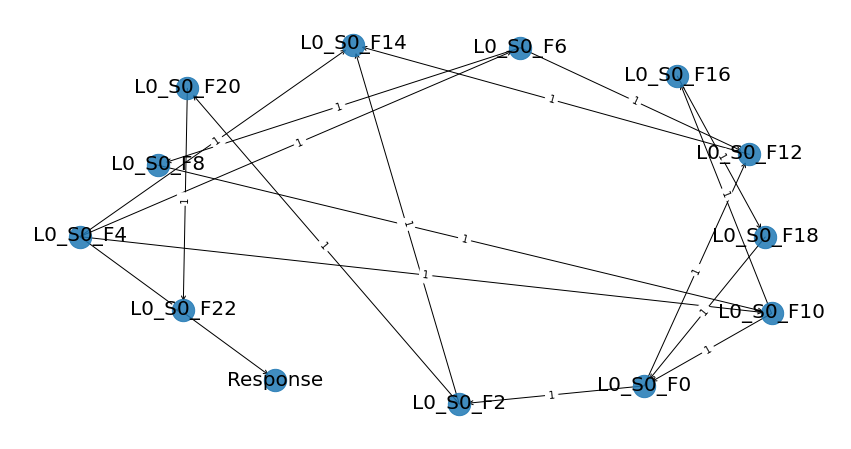

In [ ]:
# %% PLOT
model=model_update.copy()
pos=None
scale=1
figsize=(15,8)
verbose=3
out = {}
G = nx.DiGraph()  # Directed graph
layout='fruchterman_reingold'

# Extract model if in dict
if 'dict' in str(type(model)):
    model = model.get('model', None)

  # Bayesian model
if 'BayesianModel' in str(type(model)) or 'pgmpy' in str(type(model)):
    if verbose>=3: print('[BNLEARN][plot] Making plot based on BayesianModel')
    # positions for all nodes
    pos = network.graphlayout(model, pos=pos, scale=scale, layout=layout)
    # Add directed edge with weigth
    # edges=model.edges()
    edges=[*model.edges()]
    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1], weight=1, color='k')
elif 'networkx' in str(type(model)):
    if verbose>=3: print('[BNLEARN][plot] Making plot based on networkx model')
    G = model
    pos = network.graphlayout(G, pos=pos, scale=scale, layout=layout)
else:
    if verbose>=3: print('[BNLEARN][plot] Making plot based on adjacency matrix')
    G = network.adjmat2graph(model)
    # Convert adjmat to source target
    # df_edges=model.stack().reset_index()
    # df_edges.columns=['source', 'target', 'weight']
    # df_edges['weight']=df_edges['weight'].astype(float)

    # # Add directed edge with weigth
    # for i in range(df_edges.shape[0]):
    #     if df_edges['weight'].iloc[i]!=0:
    #         color='k' if df_edges['weight'].iloc[i]>0 else 'r'
    #         G.add_edge(df_edges['source'].iloc[i], df_edges['target'].iloc[i], weight=np.abs(df_edges['weight'].iloc[i]), color=color)
    # Get positions
    pos = network.graphlayout(G, pos=pos, scale=scale, layout=layout)

# Bootup figure
plt.figure(figsize=figsize)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, with_labels=True, alpha=0.85)
# edges
colors = [G[u][v].get('color','k') for u,v in G.edges()]
weights = [G[u][v].get('weight',1) for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, arrowstyle='->', edge_color=colors, width=weights)
# Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
# Get labels of weights
# labels = nx.get_edge_attributes(G,'weight')
# Plot weights
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))
# Making figure nice
ax = plt.gca()
ax.set_axis_off()

plt.savefig("station_0_model.png")
files.download("station_0_model.png")
# plt.savefig()
# plt.show()

# Store
# out['pos']=pos
# out['G']=G

In [ ]:
!pip install joblib
import joblib
joblib.dump(model_update,'/content/drive/My Drive/Early Warning Detection in production lines/wip/Train_S000.sav')
# model_update = joblib.load('/content/drive/My Drive/Early Warning Detection in production lines/wip/Train_S0.sav')
# bnlearn.plot(model_update)

['/content/drive/My Drive/Early Warning Detection in production lines/wip/Train_S000.sav']

In [ ]:
%%time
test1 = test_sets[1].copy()
test2 = test_sets[2].copy()
test3 = test_sets[3].copy()
test4 = test_sets[4].copy()
test5 = test_sets[5].copy()

seq = [test1,test2,test3,test4,test5]

li=[]
for name in seq:

  name = name.iloc[:,1:]
  print("\n*******************************************************************")
  print("\nTotal Size",name.shape)
  print("Total Response Value Counts:")
  print(name.Response.value_counts())
  # records_0 = name[name.Response==0].sample(n=75,random_state=102)
  # records_1 = name[name.Response==1].sample(n=75,random_state=102) 
  # name = pd.concat([records_0,records_1])
  # print("\nSample Size",name.shape)
  # print("Sample Response Value Counts:")
  # print(name.Response.value_counts())
  # print("*********************************************************************")

  # name = scalar.transform(name)
  # name = np.round(name, 1)
  # name = pd.DataFrame(name,columns=model_df.columns.to_list())

  prob_of_0 = []
  prob_of_1 = []

  for i in name.index.to_list():
    feature_val = name[name.index==i].values
    feature_val = feature_val[0][:-1]
    print(feature_val)
    f0,f2,f4,f6,f8,f10,f12,f14,f16,f18,f20,f22 = feature_val
    results = bnlearn.inference.fit(model_update, variables=['Response'], 
                                  evidence={'L0_S0_F0':f0,'L0_S0_F2':f2, 'L0_S0_F4':f4,'L0_S0_F6':f6,
                                            'L0_S0_F8':f8,'L0_S0_F10':f10,'L0_S0_F12':f12,'L0_S0_F14':f14,
                                            'L0_S0_F16':f16,'L0_S0_F18':f18,'L0_S0_F20':f20,'L0_S0_F22':f22},)
    p_0 = results.values[0]
    prob_of_0.append(p_0)
    p_1 = results.values[1]
    prob_of_1.append(p_1)
  
  name['Probability_0'] = prob_of_0
  name['Probability_1'] = prob_of_1
  li.append(name)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


*******************************************************************

Total Size (244, 13)
Total Response Value Counts:
1    126
0    118
Name: Response, dtype: int64
[0 3 0 0 0 1 0 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 2 1 0 0 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 2 2 2 1 3 2 1 1 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 2 4 4 0 0 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 3 0 0 2 2 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 1 1 3 4 2 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 3 4 4 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 2 2 4 3 0 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 2 1 3 1 3 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 0 0 4 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 1 2 2 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 3 3 4 3 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 3 4 4 4 3 2 3 3 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 4 2 1 3 2 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 0 3 3 1 4 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 3 3 0 0 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 1 2 0 0 2 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 4 3 4 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 0 1 0 2 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 3 3 3 1 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 4 2 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 1 2 1 2 2 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 0 0 2 2 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 4 3 1 0 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 3 3 1 0 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 2 1 0 0 1 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 3 2 2 0 0 1 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 1 3 1 0 0 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 4 4 2 0 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 3 2 4 4 4 2 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 3 2 4 4 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 1 1 3 4 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 2 3 3 1 2 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 3 2 3 2 1 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 4 3 3 3 2 0 0 0 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 2 0 4 2 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 2 3 4 3 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 3 2 4 3 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 3 0 0 2 2 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 0 0 3 2 3 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 0 1 4 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 2 1 1 2 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 4 3 1 2 0 3 3 3 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 3 2 1 3 2 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 2 2 0 0 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 0 3 3 3 1 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 2 0 0 1 0 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 4 4 4 3 3 0 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 2 1 4 2 4 4 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 4 3 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 1 2 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 4 4 4 2 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 3 3 3 4 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 4 3 4 4 2 1 1 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 3 0 0 4 4 4 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 3 4 4 1 3 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 1 0 3 3 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 4 4 4 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 3 3 1 0 0 2 2 3 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 2 0 1 2 3 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 1 2 1 3 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 4 3 3 2 2 1 1 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 1 0 0 3 3 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 1 1 0 2 1 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 4 0 0 2 3 3 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 2 0 0 1 2 2 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 2 0 0 2 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 2 1 0 0 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 4 0 0 2 3 4 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 4 1 0 1 1 4 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 4 1 0 4 2 3 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 2 1 0 3 1 3 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 0 2 2 0 2 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 0 0 3 1 4 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 2 2 3 4 4 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 3 2 1 3 1 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 2 2 1 0 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 2 3 3 4 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 2 2 1 0 0 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 0 0 0 0 2 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 4 0 0 4 4 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 2 2 0 1 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 4 4 3 3 2 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 2 2 1 2 4 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 4 2 3 0 0 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 2 1 0 3 2 4 3 3 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 3 0 0 4 4 4 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 0 1 0 3 4 2 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 0 0 1 2 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 1 1 0 1 1 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

[1 0 3 4 4 3 0 0 2 2 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 1 2 4 4 4 3 2]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 1 2 3 2 4 3 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 2 0 0 0 2 3 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 2 1 1 1 1 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 3 2 3 1 2 3 1 1 4 4]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 0 0 0 3 3 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 2 2 0 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 2 1 3 2 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 4 4 4 2 3 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 4 2 3 1 3 0 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 2 4 2 4 4 4 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 0 3 4 0 1 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 0 1 1 4 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 3 2 0 0 1 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 4 2 1 0 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 2 1 3 1 2 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 4 4 3 4 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 4 3 4 3 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 2 2 2 2 4 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 3 0 0 3 2 3 0 0 0 1]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 3 3 3 3 3 0 0 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 4 3 2 2 2 2 2 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 2 0 0 1 1 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 0 4 3 2 2 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 4 4 4 4 3 2 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 4 4 0 0 2 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 4 3 3 2 2 4 4 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 4 4 2 2 1 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 1 0 0 0 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 4 4 0 0 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 3 0 0 0 0 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 4 4 4 3 2 1 1 1 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 3 0 0 1 3 3 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 0 0 0 1 1 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 4 0 0 4 3 2 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 2 2 0 0 1 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 0 0 2 2 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 3 1 1 0 1 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 2 0 0 4 1 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 0 0 0 3 1 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 2 0 0 3 1 4 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 3 0 0 2 3 3 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 0 0 0 2 1 4 4 4 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 0 0 0 2 3 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 0 0 0 0 0 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 2 1 2 1 4 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 1 2 3 2 2 1 1 3 3]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 0 0 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 1 0 0 3 4 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 0 1 1 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 3 1 2 1 1 1 1 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 1 0 1 1 3 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 1 1 0 4 1 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 1 4 4 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 0 1 1 2 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 3 2 1 2 2 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 3 1 0 4 3 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 2 0 0 2 2 3 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 4 4 2 3 3 4 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 4 0 0 1 3 3 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 0 3 2 1 1 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 3 3 4 3 0 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 4 4 1 0 0 3 3 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 4 4 3 3 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 0 0 0 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 4 4 4 3 2 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 3 2 1 1 0 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 4 0 0 4 4 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 4 4 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 0 0 1 2 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 0 0 3 3 2 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 1 0 0 1 2 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 4 3 3 2 2 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 4 0 0 3 4 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 1 1 0 1 1 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 0 1 2 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 1 0 0 4 3 2 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 2 3 4 3 1 2 2 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 0 4 3 1 2 3 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 1 0 0 1 2 3 3 1 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 4 4 2 1 1 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 3 0 0 2 3 4 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 2 2 3 4 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 3 0 0 4 4 4 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 4 4 3 2 0 1 1 4 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 2 0 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 1 1 4 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 1 3 2 0 3 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 3 4 0 1 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 3 3 2 2 3 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 0 2 0 0 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 0 1 0 1 0 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 0 4 4 0 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 0 2 2 2 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 4 4 4 3 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 2 2 1 1 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 1 3 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 2 4 4 3 1 2 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 3 1 0 1 2 4 3 3 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 2 4 4 2 3 2 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 2 0 1 3 4 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 2 1 1 1 1 3 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 1 0 0 1 1 4 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 0 3 4 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 2 3 3 0 2 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 3 4 4 1 1 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 1 1 3 1 0 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 3 3 3 0 1 0 1 1 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 2 4 4 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 4 3 3 0 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 2 3 1 2 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 4 4 2 3 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 4 3 4 3 3 4 4 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 2 2 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 1 1 1 0 0 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 0 1 0 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 0 0 2 3 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 1 3 4 1 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 0 0 4 2 2 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 3 2 3 1 1 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 2 3 0 0 1 3 3 3 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 1 1 2 0 1 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 2 1 4 0 0 1 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 4 2 2 3 0 1 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 0 1 3 2 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 4 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 0 0 4 3 4 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 4 0 0 3 3 4 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 0 1 0 4 2 4 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 4 3 3 2 2 1 1 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 4 4 4 4 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 3 3 4 2 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 1 4 2 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 3 4 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 1 2 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 1 0 2 1 2 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 0 3 4 2 1 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 3 3 1 3 1 2 2 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 4 4 0 0 1 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 1 1 3 1 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 0 4 4 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 4 0 0 4 3 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 3 3 0 1 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 3 4 4 3 4 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 4 4 2 2 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 3 0 0 4 4 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 3 4 2 4 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 0 0 0 3 2 4 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 1 1 3 4 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 4 4 4 3 4 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 4 3 3 0 2 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 0 3 2 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+

*******************************************************************

Total Size (244, 13)
Total Response Value Counts:
1    129
0    115
Name: Response, dtype: int64
[0 3 0 0 0 2 1 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 4 0 0 1 2 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 4 4 4 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 0 0 0 0 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[1 0 3 4 4 0 1 0 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 2 2 2 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 4 3 4 1 1 1 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 0 0 0 0 0 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 0 0 0 1 2 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 4 3 4 3 3 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 2 0 0 1 0 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 1 0 0 2 3 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 4 2 1 1 3 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 3 2 4 4 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 0 4 0 4 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 0 0 2 3 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 0 1 2 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 4 0 2 3 3 1 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 3 2 2 1 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 2 2 2 3 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 1 1 0 0 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 1 0 2 4 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 1 0 1 1 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 0 0 1 4 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 3 3 1 0 1 2 2 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 0 0 1 2 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 4 3 1 2 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 1 1 3 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 4 2 4 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 3 4 3 4 2 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 2 2 3 2 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 2 3 1 4 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 0 0 0 0 3 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 2 1 1 0 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 1 4 4 0 0 2 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 4 4 3 4 0 1 1 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 4 4 1 1 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 3 3 3 2 3 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 2 2 0 1 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 1 4 3 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 4 4 0 1 0 0 0 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 0 1 0 0 1 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 3 0 0 4 4 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 4 2 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 1 2 4 3 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 1 0 0 0 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 3 3 2 3 3 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 1 0 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 3 2 1 1 4 2 2 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 0 0 0 1 0 3 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 3 0 0 1 1 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 4 0 0 3 0 3 0 0 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 4 1 0 2 1 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 3 2 3 1 4 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 0 0 3 2 3 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 4 3 2 4 2 0 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 2 3 3 4 4 1 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 3 2 4 2 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 1 2 0 1 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 2 2 2 0 1 0 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 4 0 0 2 4 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 0 3 2 1 2 4 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 3 4 3 0 2 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 2 0 0 3 3 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 1 0 0 1 1 3 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 4 4 4 2 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 1 1 1 1 1 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


[0 2 0 1 1 3 3 2 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 1 0 2 2 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 1 0 0 3 1 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 3 1 0 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 3 1 1 0 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 3 3 3 1 3 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 0 0 1 1 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 1 1 0 0 1 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 3 1 2 1 1 2 2 1 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 1 1 1 0 2 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 0 4 3 0 0 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 3 4 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 2 1 0 1 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 0 4 3 2 0 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 2 0 0 3 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 0 4 4 0 0 1 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 1 0 0 4 4 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 0 1 1 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 0 0 0 3 1 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 2 0 0 1 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 3 3 4 4 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 1 0 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 1 0 2 2 2 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 2 0 0 0 4 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 0 0 0 0 1 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 3 2 0 0 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 0 4 3 1 1 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 2 1 3 3 4 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 1 3 4 1 2 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 0 0 1 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[1 4 4 0 0 4 4 4 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 0 0 2 0 3 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 0 0 0 0 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 3 0 2 1 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 2 1 0 1 2 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 4 3 3 4 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 3 3 4 2 2 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 3 4 4 1 2 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 1 2 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 2 1 1 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 2 2 3 3 0 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 0 1 3 0 1 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 3 4 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 1 0 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 1 4 2 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 3 2 1 2 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 3 4 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 0 0 0 0 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 1 2 2 1 4 0 0 4 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 3 0 1 1 1 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 3 0 0 1 4 3 0 0 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 3 4 4 4 4 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 3 1 1 0 1 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 4 4 3 2 1 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 3 0 0 4 2 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 4 4 0 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 2 1 4 1 4 2 2 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 4 3 4 1 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 4 4 4 0 2 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 3 2 0 1 1 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 0 1 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 1 2 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 1 2 3 4 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 3 1 1 2 4 4 2 2 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 2 0 4 4 4 1 1 2 3]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 0 3 3 4 3 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 0 2 1 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 2 4 4 3 1 0 0 0 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 4 3 3 4 4 1 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 0 3 1 0 0 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 4 0 0 4 4 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 1 2 3 2 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 3 4 2 1 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 3 1 2 0 3 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 4 3 0 2 2 1 1 3 4]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 4 2 1 2 0 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 2 3 2 1 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 0 3 3 0 0 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 1 2 1 1 2 1 1 3 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 4 3 3 1 3 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 2 1 1 2 1 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 0 0 0 2 1 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 0 0 0 0 2 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 3 3 0 3 2 3 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 3 2 1 1 1 2 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 0 0 3 3 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 4 2 1 4 4 4 1 1 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 3 4 4 0 0 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 4 3 3 3 3 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 3 0 2 2 4 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 1 2 3 3 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 3 3 0 0 3 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[1 0 2 3 0 2 1 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 2 3 1 0 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[1 0 1 4 4 0 1 0 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 2 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 2 1 4 1 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 3 4 3 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 1 0 4 3 3 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 4 4 1 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 0 0 1 2 4 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



[0 4 0 2 3 0 1 3 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 3 0 0 4 4 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 0 0 0 1 2 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 2 0 3 4 4 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 1 0 0 4 4 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 2 0 2 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 1 3 2 1 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 4 3 4 1 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[0 3 3 0 2 3 3 2 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 1 2 3 2 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 4 0 0 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 4 3 3 0 2 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 2 0 0 0 3 1 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 2 1 4 2 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 0 0 4 3 3 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 0 0 0 0 3 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 3 2 3 3 3 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 1 4 4 0 1 1 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 2 4 4 2 1 2 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 3 2 1 3 4 2 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 4 0 0 2 3 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 3 0 0 2 4 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 1 2 1 2 2 3 1 1 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 2 0 4 2 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 2 0 2 3 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 4 2 4 4 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 1 0 0 0 0 4 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 2 2 2 2 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 2 0 0 0 1 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 4 3 2 2 0 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 4 3 3 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 2 1 1 2 1 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 3 4 1 4 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 3 4 1 4 1 1 1 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 2 4 3 0 0 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 0 0 0 2 1 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 2 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 3 0 0 1 3 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 4 3 1 0 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 0 0 4 2 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 0 0 4 3 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 2 2 3 4 3 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 1 1 2 3 1 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 2 1 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 0 2 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 0 0 4 3 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 4 4 4 0 2 0 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 1 1 4 3 3 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 2 4 4 0 3 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 4 0 0 3 2 3 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 1 0 0 2 3 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 4 0 0 4 2 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 3 4 4 3 4 1 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 3 3 3 2 0 0 0 2 3]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 1 1 2 2 4 1 1 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 4 4 4 3 3 0 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 4 4 4 3 3 2 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 4 0 0 2 1 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 1 0 0 4 2 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 3 3 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 3 4 4 1 4 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 3 0 0 0 1 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 2 0 4 2 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 4 4 2 0 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 0 0 1 1 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 4 4 2 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 4 4 2 1 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 4 3 4 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[1 1 0 2 2 1 0 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 0 4 3 3 0 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 0 0 0 2 0 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 1 0 0 0 0 3 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 1 0 2 0 4 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 2 3 3 3 1 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+

*******************************************************************

Total Size (244, 13)
Total Response Value Counts:
0    126
1    118
Name: Response, dtype: int64
[1 0 4 3 3 1 0 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 3 0 0 0 0 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 3 3 1 2 1 2 2 2 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 3 3 1 2 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 0 1 3 1 1 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 0 0 0 2 0 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 4 3 2 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 1 1 1 4 4 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 1 0 3 2 2 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 4 2 1 4 2 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 4 4 1 1 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 1 2 1 0 0 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 0 1 1 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 4 4 4 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 3 3 2 4 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 2 0 0 1 3 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 1 0 0 3 1 3 0 0 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 3 3 1 2 0 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 1 0 0 2 4 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 2 3 0 1 0 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 0 0 3 2 4 2 2 1 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 4 4 0 0 2 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 0 2 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 1 0 1 1 1 1 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 2 1 1 2 3 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 1 1 0 0 0 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 0 0 0 2 4 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 2 2 1 1 2 2 2 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 2 4 4 4 1 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 0 1 2 1 2 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 4 4 3 2 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 0 0 1 2 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 0 4 4 4 4 1 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 1 0 0 3 4 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 2 2 0 0 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 2 3 4 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 3 3 3 2 2 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 1 0 4 3 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 0 0 1 2 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 3 3 0 0 0 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 2 2 3 2 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 0 0 0 1 1 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 3 1 1 0 3 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 2 1 0 0 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 4 1 1 3 1 2 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 4 0 0 2 2 4 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 0 0 0 2 3 4 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 3 0 0 4 2 4 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 3 0 0 2 4 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 2 0 2 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 2 0 0 4 4 3 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 4 2 3 4 4 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 2 2 1 2 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 4 3 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 4 2 3 1 2 0 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 3 3 1 0 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 3 2 4 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 1 0 0 0 0 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 4 3 1 2 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 0 1 3 3 1 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 0 0 2 3 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 0 0 4 4 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 3 2 3 2 1 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 2 2 1 2 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 4 0 0 2 3 4 0 0 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 1 2 2 0 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 4 1 0 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 4 0 0 0 4 3 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 3 4 4 0 1 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 2 3 0 1 0 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 2 0 0 4 2 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 1 0 4 0 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 3 3 2 1 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 1 0 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 1 1 1 3 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 4 0 0 4 2 4 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 3 0 1 3 4 2 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 0 3 3 1 2 3 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 0 1 0 2 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 1 4 4 0 0 0 4 4 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 2 0 0 1 1 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 1 0 0 4 4 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 0 0 2 1 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 2 2 0 1 1 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 3 1 3 2 2 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 3 1 0 4 1 4 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 2 2 4 2 0 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 0 0 1 1 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 2 0 1 4 4 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 2 3 4 0 0 0 2 2 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 0 0 0 1 2 3 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 4 0 2 0 3 3 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 0 0 2 3 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 0 0 0 4 2 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 2 2 1 3 2 2 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 2 3 3 2 2 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 4 4 4 1 1 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 3 2 0 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 3 4 2 2 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 0 0 0 0 3 2 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 0 0 2 2 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 4 0 0 1 1 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 2 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 3 3 3 4 2 4 4 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 3 1 0 3 4 2 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 3 0 0 2 3 4 3 3 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 0 0 4 2 3 0 0 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 3 3 3 4 4 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 0 0 2 0 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 4 2 1 0 0 1 2 2 1 0]

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 2 4 4 1 2 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 3 4 0 0 0 2 2 2 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 1 3 4 0 2 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 2 3 3 3 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 4 0 0 3 4 4 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 3 0 2 0 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 2 2 4 3 4 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 2 3 3 1 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 3 3 1 0 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 2 3 3 1 3 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 1 0 0 0 0 1 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 2 2 1 3 0 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 1 1 0 0 1 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 0 0 0 1 2 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 4 0 0 4 3 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 0 1 1 2 1 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 4 0 1 0 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 3 2 0 4 3 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 1 0 0 1 1 3 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 0 3 2 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 4 3 2 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 2 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 1 3 2 4 3 4 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 2 2 0 0 1 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 0 3 2 3 3 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 1 0 0 4 2 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 0 0 0 1 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 3 1 0 4 4 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 2 3 0 0 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 3 4 4 4 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 1 0 1 1 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 4 4 4 4 1 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 0 3 0 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 0 2 3 3 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 2 4 4 1 1 1 2 2 3 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 3 3 0 1 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 4 1 2 3 2 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 3 3 1 1 1 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 2 1 0 0 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 4 2 1 2 4 2 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 3 3 2 3 2 1 1 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 3 2 2 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 4 0 0 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 2 3 3 0 1 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 3 3 1 1 1 1 1 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 3 0 0 4 2 3 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 1 0 0 2 0 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 2 2 1 1 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 2 4 4 2 0 2 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 2 0 0 4 3 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 1 4 4 0 0 0 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 3 2 3 1 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 0 2 0 1 1 1 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 0 2 2 2 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 3 3 3 3 1 1 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 4 4 1 3 0 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 1 1 2 1 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 3 3 0 0 2 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 1 0 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 3 3 2 4 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 3 3 3 4 3 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 1 1 1 0 4 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 4 4 1 3 1 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 1 0 4 4 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 0 2 2 0 0 0 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 0 0 0 4 4 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 0 2 1 4 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 1 0 0 1 4 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 3 4 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 4 3 2 1 3 0 0 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 0 0 4 4 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 4 1 1 1 2 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 0 0 1 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 3 0 0 4 4 4 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 3 2 0 0 2 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=======

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 1 0 0 0 1 4 2 2 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 2 1 0 0 1 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 3 0 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 2 1 2 2 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 4 2 1 1 0 1 4 4 0 0]

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 4 3 2 1 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 4 4 2 1 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 3 3 3 1 0 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 3 3 1 2 3 4 4 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 0 0 0 3 2 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 1 2 3 1 0 4 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 2 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 1 0 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 4 4 4 3 1 2 3 3 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 4 4 0 0 0 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 0 0 3 3 2 1 1 2 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 3 0 0 2 1 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 0 3 3 0 0 0 0 0 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 0 0 1 0 2 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 4 4 2 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 2 3 4 4 3 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 4 2 3 1 1 1 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 3 2 4 4 1 4 4 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 0 1 4 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 2 2 1 1 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 4 0 0 3 2 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 2 0 0 1 1 4 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 3 4 3 4 3 3 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 0 2 4 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 3 3 1 4 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 3 2 1 2 4 4 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 0 2 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 3 0 0 3 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 2 0 3 0 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 3 0 0 3 4 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 4 4 0 3 0 1 1 3 4]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 0 1 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 1 0 3 2 4 4 4 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 1 1 2 0 3 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 0 0 2 2 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 0 1 3 2 1 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 3 3 1 1 2 3 0 0 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 0 1 0 0 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 3 4 4 3 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 0 0 3 4 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 4 0 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 4 3 4 4 2 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

[0 1 3 1 0 3 3 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 0 0 3 2 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 0 1 1 0 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 2 3 4 3 1 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 2 2 0 1 2 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 1 3 4 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 4 2 0 4 3 4 1 1 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 3 0 0 0 0 4 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 2 4 4 1 3 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 4 4 4 2 2 0 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+

*******************************************************************

Total Size (244, 13)
Total Response Value Counts:
0    123
1    121
Name: Re

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 0 4 4 3 3 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 1 2 4 3 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[0 1 0 3 3 0 1 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 0 0 0 3 4 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 2 2 3 1 2 1 1 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 2 3 3 1 2 3 2 2 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 3 0 0 3 4 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 2 4 3 4 0 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 2 2 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 4 4 4 1 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 4 4 3 0 3 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 1 0 1 0 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 1 1 1 0 0 3 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 4 4 0 2 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 4 0 0 1 2 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 3 1 1 0 1 3 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 4 0 0 4 4 4 3 3 3 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 0 0 0 1 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 4 3 3 1 1 0 3 3 1 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 3 0 0 2 3 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 4 0 0 1 3 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 1 1 1 1 2 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 2 2 3 2 2 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 3 0 0 4 4 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 4 4 3 3 0 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 3 3 4 1 3 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 3 3 1 0 0 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 2 2 0 0 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 3 2 2 2 1 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 0 3 3 0 0 3 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 2 3 3 3 0 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 1 0 0 4 3 2 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 4 0 0 3 3 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 4 4 3 4 0 3 3 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 4 2 3 1 3 3 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 3 3 1 3 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 4 1 0 1 2 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 1 1 2 0 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 0 0 2 2 2 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 1 3 2 1 2 3 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 3 4 3 4 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 0 0 0 0 3 2 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 0 3 3 2 0 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 0 0 1 1 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 2 2 2 1 0 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 1 0 1 3 3 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 0 2 3 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[1 3 3 0 0 2 0 3 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 3 2 1 1 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 3 3 1 2 1 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 3 3 0 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 1 2 3 4 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 4 4 4 1 2 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 2 2 2 0 2 1 1 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 4 3 2 3 2 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[1 1 0 1 0 2 0 2 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 2 3 4 4 1 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 0 4 4 0 0 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 4 0 0 4 2 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 0 0 0 2 1 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 3 4 2 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 2 3 2 4 3 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 4 4 4 3 2 2 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 3 3 2 2 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 3 4 4 2 4 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 1 1 1 3 4 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 2 0 3 3 2 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 0 0 0 2 4 3 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 3 4 4 4 3 1 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 0 3 3 4 1 0 3 3 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 0 0 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 0 4 3 1 0 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 1 0 0 2 1 4 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 1 2 3 4 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 4 0 0 4 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 4 2 2 2 3 0 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 2 0 2 1 2 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 3 0 0 1 3 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 4 4 1 1 2 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 1 1 1 4 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 2 3 0 0 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 3 2 1 1 0 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 2 0 0 1 3 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 4 1 3 0 2 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 3 0 0 4 3 3 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 1 0 3 1 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 2 2 2 0 0 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 3 0 0 3 4 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 1 2 1 2 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 2 3 4 3 0 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 3 3 3 2 0 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 0 0 3 1 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 4 3 4 4 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 4 3 4 0 0 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 2 1 0 2 1 3 3 3 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 1 1 2 0 0 2 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 2 2 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 0 0 2 4 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 4 2 2 4 2 2 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 0 0 0 0 0 4 2 2 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 1 3 1 2 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 1 1 4 4 1 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 1 1 0 1 1 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 2 2 4 2 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 0 0 1 0 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 3 1 1 3 3 4 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 1 0 0 3 4 2 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 1 0 1 1 4 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 2 1 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 3 0 0 0 2 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 4 3 3 0 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 2 4 4 3 2 2 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 3 0 0 3 3 4 4 4 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 3 4 3 2 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 3 0 0 2 1 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 4 3 1 0 2 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 1 0 3 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 0 4 4 4 3 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 1 2 3 3 1 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 3 3 3 2 1 2 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 1 0 0 4 2 3 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 4 3 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 3 3 1 0 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 3 3 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 3 4 2 3 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 4 3 4 3 2 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 2 0 0 4 2 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 3 3 3 1 3 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 3 3 3 3 3 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 2 4 4 0 2 0 0 0 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 4 3 3 2 2 2 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 0 2 2 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 2 1 0 0 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 4 4 3 3 1 2 2 4 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 1 2 0 1 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 0 0 0 0 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 3 3 3 0 2 0 2 2 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 3 3 2 4 2 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 2 3 0 0 0 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 4 4 4 2 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 1 2 4 1 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 3 1 3 3 2 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 0 0 2 2 3 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 3 1 0 0 1 2 2 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 4 0 0 4 4 4 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 3 1 0 2 3 4 2 2 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 4 1 0 2 2 3 2 2 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 2 2 3 2 1 4 4 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 3 2 2 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 4 0 0 4 4 2 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 4 3 3 3 4 2 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 3 2 2 2 3 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 0 0 4 4 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 4 3 4 1 1 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 2 1 3 2 1 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 4 3 4 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 2 0 2 3 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 3 2 1 4 4 3 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 1 2 1 4 0 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 2 3 1 1 0 2 3 3 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 4 4 4 3 1 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 2 2 1 1 1 3 1 1 3 2]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 2 0 0 3 3 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 3 0 0 4 4 4 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 3 1 2 0 2 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 2 3 3 4 0 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 3 0 0 1 2 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 3 3 0 0 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 3 4 4 4 3 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 0 0 4 2 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 2 4 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 3 3 1 1 1 0 0 3 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 4 2 1 2 1 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 0 4 4 3 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 2 0 0 1 4 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 3 0 0 4 4 4 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 0 0 1 1 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 3 3 4 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 2 2 0 0 2 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 3 4 3 4 0 0 0 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 2 2 0 0 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 4 3 3 1 1 0 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 4 4 4 0 1 0 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 3 0 0 2 2 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 3 4 2 3 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 1 0 1 1 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 1 3 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 1 1 0 4 4 2 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 0 0 3 2 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 0 0 4 4 2 4 4 1 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 4 0 0 4 4 3 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 2 1 3 4 3 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 3 0 2 0 2 2 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 2 1 3 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 3 3 1 0 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 2 1 3 1 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 4 3 3 2 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 3 2 3 4 0 3 3 4 4]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 0 0 2 3 4 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 2 0 0 2 4 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 4 0 0 4 3 4 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 4 0 0 2 1 4 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 3 1 0 0 0 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 2 4 4 1 0 1 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 4 2 1 4 4 4 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 3 2 4 3 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 2 0 0 1 2 4 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 4 1 0 4 4 4 1 1 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 3 2 1 1 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 2 4 3 4 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 1 1 0 1 4 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 4 4 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 4 4 0 0 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 3 4 4 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 4 4 0 1 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 0 0 2 3 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 4 4 0 1 1 2 2 3 3]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 4 2 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 1 3 3 3 4 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 4 1 1 0 0 1 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 4 2 1 2 4 2 4 4 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 3 3 2 3 4 2 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 4 3 1 2 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 2 4 4 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 0 4 3 0 0 3 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 2 3 4 1 1 2 4 4 4 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 2 1 3 0 2 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 4 0 0 3 4 4 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 3 0 0 4 3 3 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 0 0 0 1 2 0 0 0 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 0 0 2 2 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 0 1 3 3 1 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 1 0 1 1 4 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 3 2 0 0 2 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 0 1 4 1 1 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 4 0 0 4 4 3 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 2 2 3 2 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 2 1 4 4 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 0 0 0 2 1 4 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 3 1 0 3 0 3 0 0 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 4 4 4 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+

*******************************************************************

Total Size (244, 13)
Total Response Value Counts:


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0    130
1    114
Name: Response, dtype: int64
[1 1 3 3 1 3 2 2 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 4 4 3 2 2 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 3 2 0 3 3 2 3 3 0 1]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 3 0 1 0 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 4 4 4 3 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 2 3 0 0 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 3 2 0 0 2 3 3 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 4 4 4 3 2 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 2 3 3 0 0 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 3 0 4 3 2 3 3 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 0 4 3 4 3 0 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 3 3 3 3 1 2 2 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 2 0 0 4 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 0 2 3 3 1 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 4 3 1 4 1 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 2 0 0 3 2 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 3 4 4 3 4 1 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 4 0 0 4 4 4 2 2 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 0 0 2 1 2 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 1 2 3 3 1 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 2 4 4 0 0 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 4 4 4 1 0 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 3 1 0 3 4 3 4 4 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 4 2 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 0 0 2 3 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 3 2 3 1 1 3 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 3 0 0 1 3 3 1 1 3 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 4 4 3 4 0 2 3 3 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 0 1 4 4 2 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 4 0 1 1 0 3 2 2 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 4 2 0 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 0 1 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 4 3 0 0 3 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 0 4 3 2 4 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 3 4 4 3 0 0 0 0 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 0 0 0 0 0 4 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 0 0 2 0 4 0 0 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 4 4 4 1 1 1 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 3 4 4 2 4 1 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 2 0 4 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 0 0 1 2 2 1 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 2 0 2 0 1 1 3 3 1 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 4 2 1 4 4 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 1 1 2 3 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 2 0 0 0 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 2 1 1 1 3 2 0 0 3 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 4 4 4 2 2 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 2 0 4 3 4 1 1 3 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 3 1 4 2 2 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 3 0 0 2 2 4 1 1 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 1 2 0 1 2 2 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 0 0 1 1 2 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 4 2 2 3 2 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 1 0 0 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 4 4 3 1 2 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 1 0 0 1 1 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 4 1 2 3 2 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 0 3 3 4 0 1 2 2 2 2]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 0 0 3 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 4 3 2 4 4 4 0 0 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 3 3 4 4 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 0 1 1 0 1 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 4 4 1 1 1 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 3 1 1 0 0 1 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 3 1 0 4 4 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 1 3 4 2 2 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 0 0 4 3 2 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 0 0 0 4 3 3 1 1 1 0]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 1 1 0 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 2 0 0 2 3 2 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 3 3 2 0 1 2 2 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 2 3 0 1 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 3 0 4 1 4 0 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 2 0 3 2 3 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 2 4 0 3 4 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 2 1 0 4 4 4 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



[0 2 0 0 0 1 3 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 0 0 1 3 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 4 1 1 4 4 2 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 4 2 1 1 3 1 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 2 1 4 0 1 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 3 4 4 3 3 0 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 0 1 3 2 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 2 0 0 4 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 2 0 0 1 1 4 4 4 1 0]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 3 3 3 1 2 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 3 4 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 1 4 4 2 3 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 3 1 1 0 1 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 1 1 0 3 2 2 3 3 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 2 1 1 2 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 3 1 1 2 3 1 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 2 0 0 3 2 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 3 4 4 2 3 0 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 4 1 3 0 3 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 0 0 2 3 3 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 3 4 1 4 3 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 0 1 1 0 0 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 1 1 2 2 4 1 0 0 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 0 0 3 2 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 2 0 0 2 2 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 4 1 0 0 1 0 4 4 4 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 2 2 1 1 4 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 3 3 3 4 3 2 2 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 4 0 0 1 1 3 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 4 2 0 0 3 4 4 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 0 1 2 3 1 2 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 4 4 0 0 1 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 4 1 0 3 4 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 1 0 0 1 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 0 3 1 0 4 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 3 4 4 1 0 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 4 0 0 4 4 3 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 4 4 4 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 3 4 0 0 0 0 0 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 4 1 0 4 2 2 2 2 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 0 3 3 0 0 3 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 4 4 3 3 4 2 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 2 3 3 0 0 1 0 0 2 3]

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 0 2 4 4 0 0 0 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 1 0 0 2 2 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 4 4 4 4 1 1 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 1 0 2 1 2 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 4 4 3 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 3 0 0 3 3 3 3 3 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 1 0 3 2 1 2 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 1 0 0 2 1 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 4 1 3 0 4 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 3 0 3 1 3 1 4 3 3 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 1 2 4 1 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 0 1 2 1 4 2 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 0 0 4 4 4 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 0 3 3 0 0 3 0 0 4 4]
[BNLEARN][inference] Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 2 0 4 3 0 0 2 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 0 0 2 0 3 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 4 0 0 1 2 4 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 3 3 0 0 0 1 1 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 4 0 0 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 1 0 4 2 2 0 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 1 0 1 3 2 0 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 4 0 0 2 1 3 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 2 2 2 4 3 2 1 1 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 0 2 1 3 3 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 1 0 0 1 4 3 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 0 3 2 0 0 4 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 4 4 1 1 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 3 3 1 3 4 2 0 0 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 3 3 3 1 2 1 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 3 4 4 0 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 4 2 0 0 3 2 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 3 3 0 0 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 4 0 0 0 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 0 4 4 1 0 0 0 0 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 2 1 0 0 1 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 4 4 0 2 1 1 1 4 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 4 4 3 4 4 3 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 0 4 4 2 1 0 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 4 4 4 4 0 0 3 3 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 0 0 0 1 3 3 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 2 3 0 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 0 0 1 2 4 4 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 2 2 4 3 3 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 4 4 3 2 0 4 4 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 3 4 4 3 3 0 4 4 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 1 0 0 2 1 4 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 2 2 4 0 0 2 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 3 2 1 1 2 1 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 2 0 0 0 3 1 3 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 4 2 1 1 2 2 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 3 4 2 1 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 2 1 2 0 1 2 2 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 3 0 0 3 4 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 3 1 3 3 1 3 3 4 4 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 0 0 4 1 4 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 4 4 4 3 1 0 0 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 3 3 2 2 1 1 1 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 1 1 1 2 0 1 1 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 3 3 3 4 0 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 1 0 4 3 2 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 1 4 3 0 0 2 0 0 3 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 0 2 4 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 3 4 0 0 0 4 2 4 4 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 3 3 3 4 4 3 1 1 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 0 0 3 3 4 3 0 3 3 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 2 4 4 0 1 1 2 2 4 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 4 0 0 0 4 2 0 0 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 2 0 2 3 0 1 0 4 4 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 0 4 4 2 3 3 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 1 1 1 2 3 3 0 3 3 0 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 1 0 0 3 1 4 3 3 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 3 3 4 1 1 2 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 4 0 0 1 3 4 4 4 3 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 3 0 3 2 1 0 4 1 1 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 0 4 4 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 4 3 0 4 4 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 0 1 4 4 0 1 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 0 0 0 2 3 3 3 3 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 3 3 0 0 0 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 4 4 1 1 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 4 4 2 3 1 4 3 1 1 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 1 3 0 1 1 1 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 1 2 4 4 1 1 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 3 2 0 1 0 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 2 0 0 1 2 0 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 1 4 3 3 4 1 1 0 0 2 2]
[BNLEARN][inference] Variable Elimination..

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 4 4 4 1 1 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 0 0 2 2 4 4 4 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 1 1 1 2 4 3 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 3 0 0 1 2 3 1 1 0 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 2 2 1 1 0 4 4 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 3 0 0 4 3 4 4 4 2 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 1 2 2 1 1 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 4 0 0 0 1 1 4 3 3 2 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 1 1 0 1 2 1 1 3 2]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 4 3 0 0 1 2 3 2 2 1 0]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[0 0 0 3 1 0 0 1 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 1 4 4 2 4 0 4 4 4 3]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 1 2 4 4 2 4 4 3 3]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 1 1 2 1 0 1 1 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 0 4 3 3 2 3 2 2 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 3 2 1 1 1 0 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 1 0 4 4 1 2 0 4 4 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 0 4 4 4 4 3 0 0 0 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[1 2 1 0 2 3 3 0 1 1 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 1 0 0 2 4 2 4 4 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 2 1 0 0 2 1 2 2 2 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 2 4 4 0 0 1 3 3 3 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 2 0 0 0 0 0 2 2 2 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[0 4 0 2 2 1 1 4 3 3 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 2 1 0 1 2 3 1 0 0 4 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 4 2 2 0 1 3 4 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 0 1 3 2 0 0 0 3 3 0 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 0 1 3 4 0 2 0 2 2 4 4]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 0 1 4 4 0 1 0 2 2 3 4]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 3 0 1 0 2 0 3 0 0 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 4 2 0 2 3 4 1 4 4 2 3]
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[0 2 1 0 0 0 0 2 0 0 0 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[1 2 3 2 2 2 2 2 1 1 2 3]
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
[1 3 2 0 0 1 3 3 1 1 1 1]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
[1 3 0 0 0 3 4 4 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
[1 0 1 3 3 0 0 0 0 0 1 1]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
[0 3 4 1 0 3 3 3 2 2 2 2]
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
[0 4 1 0 0 2 2 4 3 3 1 0]
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
CPU times: user 2min 2s, sys: 4.28 s, total: 2min 7s
Wall time: 2min 11s


In [ ]:
test1 = li[0]
test2 = li[1]
test3 = li[2]
test4 = li[3]
test5 = li[4]
print(test1.shape)
print(test2.shape)
print(test3.shape)
print(test4.shape)
print(test5.shape)

(244, 15)
(244, 15)
(244, 15)
(244, 15)
(244, 15)


In [ ]:
test1.model_prediction.value_counts()

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
p_t1, r_t1, thresholds_t1 = precision_recall_curve(test1['Response'], test1['Probability_1'])
p_t2, r_t2, thresholds_t2 = precision_recall_curve(test2['Response'], test2['Probability_1'])
p_t3, r_t3, thresholds_t3 = precision_recall_curve(test3['Response'], test3['Probability_1'])
p_t4, r_t4, thresholds_t4 = precision_recall_curve(test4['Response'], test4['Probability_1'])
p_t5, r_t5, thresholds_t5 = precision_recall_curve(test5['Response'], test5['Probability_1'])

In [ ]:
# precision Recall curve
#import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.title("Comparision of Precision and Recall for optimun decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.savefig("station_0_threshold_graph.png")
    files.download("station_0_threshold_graph.png")

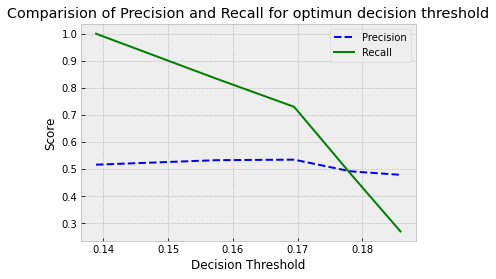

In [ ]:
fig1 = plot_precision_recall_vs_threshold(p_t1, r_t1, thresholds_t1)

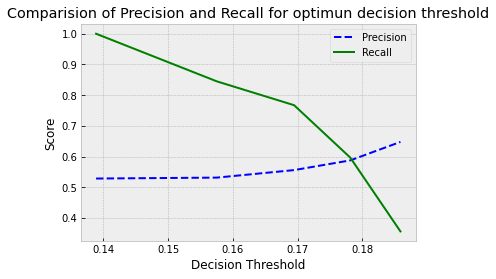

In [ ]:
plot_precision_recall_vs_threshold(p_t2, r_t2, thresholds_t2)

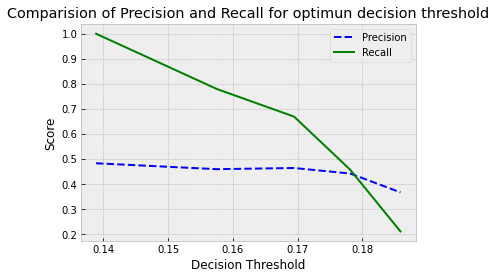

In [ ]:
plot_precision_recall_vs_threshold(p_t3, r_t3, thresholds_t3)

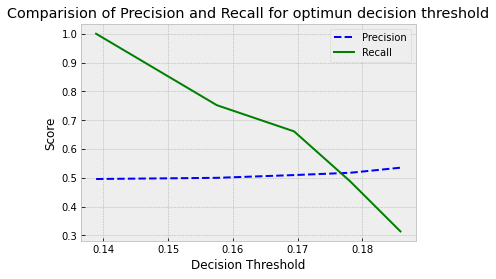

In [ ]:
plot_precision_recall_vs_threshold(p_t4, r_t4, thresholds_t4)

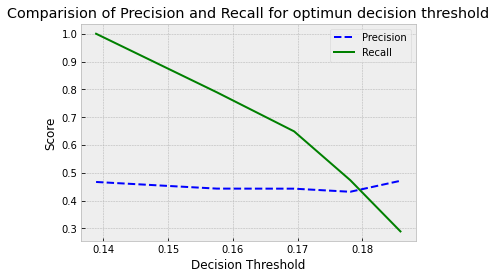

In [ ]:
plot_precision_recall_vs_threshold(p_t5, r_t5, thresholds_t5)

Enter the starting threshold limit: 0
Enter the Ending threshold limt: 1
Number of Threshold to created: 1000

Summary table
     thresholds  ...  mean_average_precision_score_values
185    0.185185  ...                            50.263630
184    0.184184  ...                            50.263630
183    0.183183  ...                            50.263630
182    0.182182  ...                            50.263630
181    0.181181  ...                            50.263630
180    0.180180  ...                            50.263630
179    0.179179  ...                            50.263630
178    0.178178  ...                            50.263630
169    0.169169  ...                            50.142625
168    0.168168  ...                            50.142625

[10 rows x 7 columns]

Best Threshold Value : 0.18518518518518517

Test Data Reports and PR Graphs

*****************************************************
Model Accuracy : 47.13114754098361
Model Recall : 26.984126984126984
Model Precisi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*****************************************************
Model Accuracy : 55.73770491803278
Model Recall : 35.65891472868217
Model Precision : 64.7887323943662
average_precision_score : 57.119352280924076
Confusion Matrix is 
 [[90 25]
 [83 46]]
Classification Report 

               precision    recall  f1-score   support

           0       0.52      0.78      0.62       115
           1       0.65      0.36      0.46       129

    accuracy                           0.56       244
   macro avg       0.58      0.57      0.54       244
weighted avg       0.59      0.56      0.54       244



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*****************************************************
Model Accuracy : 44.26229508196721
Model Recall : 21.1864406779661
Model Precision : 36.76470588235294
average_precision_score : 45.903886700554075
Confusion Matrix is 
 [[83 43]
 [93 25]]
Classification Report 

               precision    recall  f1-score   support

           0       0.47      0.66      0.55       126
           1       0.37      0.21      0.27       118

    accuracy                           0.44       244
   macro avg       0.42      0.44      0.41       244
weighted avg       0.42      0.44      0.41       244



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*****************************************************
Model Accuracy : 52.459016393442624
Model Recall : 31.40495867768595
Model Precision : 53.52112676056338
average_precision_score : 50.8246811856098
Confusion Matrix is 
 [[90 33]
 [83 38]]
Classification Report 

               precision    recall  f1-score   support

           0       0.52      0.73      0.61       123
           1       0.54      0.31      0.40       121

    accuracy                           0.52       244
   macro avg       0.53      0.52      0.50       244
weighted avg       0.53      0.52      0.50       244



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*****************************************************


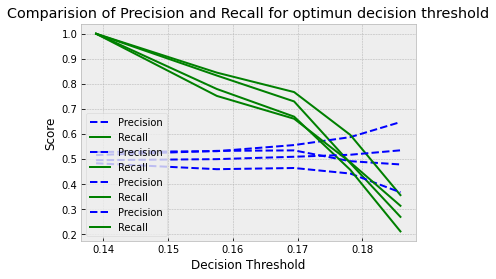

In [ ]:
sv = float(input("Enter the starting threshold limit: "))
ev = float(input("Enter the Ending threshold limt: "))
n = int(input("Number of Threshold to created: "))

sum_tab_list =[]

for name in [test1,test2,test3,test4,test5]:
  
  thresholds_list = []
  average_precision_score_list = []

  for thresh in np.linspace(sv,ev,n):
    name['model_prediction'] = name['Probability_1'].apply(lambda x : 0 if x <= thresh else 1)
    f1 = (average_precision_score(name['Response'],name['model_prediction']))*100
    thresholds_list.append(thresh)
    average_precision_score_list.append(f1)

  sum_tab = pd.DataFrame()
  sum_tab['thresholds'] = thresholds_list
  sum_tab['average_precision_score'] = average_precision_score_list
  #sum_tab = sum_tab.sort_values('f1_values',ascending=False)
  sum_tab_list.append(sum_tab)

print("\nSummary table")
summary_table = pd.concat(sum_tab_list,axis=1)
summary_table = summary_table.iloc[:,[0,1,3,5,7,9]]
summary_table.columns = ['thresholds','test1_average_precision_score_values','test2_average_precision_score_values','test3_average_precision_score_values','test4_average_precision_score_values','test5_average_precision_score_values']
summary_table['mean_average_precision_score_values'] = (summary_table['test1_average_precision_score_values']+summary_table['test2_average_precision_score_values']+summary_table['test3_average_precision_score_values']+summary_table['test4_average_precision_score_values']+summary_table['test5_average_precision_score_values'])/5
summary_table = summary_table.sort_values(['mean_average_precision_score_values','thresholds'],ascending=False)
print(summary_table.head(10))

print('\nBest Threshold Value :',summary_table.iloc[0]['thresholds'])

print("\nTest Data Reports and PR Graphs\n")
print("*****************************************************")
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer



for test in [test1,test2,test3,test4]:
  test['model_prediction'] = test['Probability_1'].apply(lambda x : 0 if x <= summary_table.iloc[0]['thresholds'] else 1)

  # Evaluation Metrics
  acc = accuracy_score(test['Response'],test['model_prediction'])
  print("Model Accuracy :", acc*100)
  rec = recall_score(test['Response'],test['model_prediction'])
  print("Model Recall :", rec*100)
  pre = precision_score(test['Response'],test['model_prediction'])
  print("Model Precision :", pre*100)
  average_precision_score_1 = average_precision_score(test['Response'],test['model_prediction'])
  print("average_precision_score :", average_precision_score_1*100)
  cc = confusion_matrix(test['Response'],test['model_prediction'])
  print('Confusion Matrix is \n',cc)
  print('Classification Report \n\n',classification_report(test['Response'], test['model_prediction']))


  # precision Recall curve
  p, r, thresholds = precision_recall_curve(test['Response'], test['Probability_1'])
  plot_precision_recall_vs_threshold(p, r, thresholds)
  print("*****************************************************")

In [ ]:
decision_threshold=summary_table['thresholds'].iloc[0]

In [ ]:
decision_threshold

0.18518518518518517

In [ ]:
####run the model with new threshold
### run the status testing codes and generate files


In [ ]:
test1.head()

,Response,L0_S0_F0,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F2,L0_S0_F20,L0_S0_F22,L0_S0_F4,L0_S0_F6,L0_S0_F8,Probability_0,Probability_1,model_prediction
2462,0,3,0,0,0,1,0,4,4,4,1,1,0,0.821882,0.178118,0
6842,0,1,4,2,1,0,0,1,0,0,0,0,4,0.861111,0.138889,0
11988,1,2,2,2,2,1,3,2,1,1,3,3,4,0.842469,0.157531,0
19944,0,0,2,4,4,0,0,0,3,3,2,2,4,0.842469,0.157531,0
24693,1,3,3,0,0,2,2,3,2,2,1,1,1,0.830549,0.169451,0


In [ ]:
#updated model prediction using the latest theshhold
ui_set=pd.concat([test1,test2,test3,test4,test5])

In [ ]:
ui_set_product_id=pd.concat([test_sets[1][['Id']],test_sets[2][['Id']],test_sets[3][['Id']],test_sets[4][['Id']],test_sets[5][['Id']]])

In [ ]:
ui_set=pd.concat([ui_set,ui_set_product_id],axis=1)

In [ ]:
ui_set['model_results']=ui_set['Probability_1'].apply(lambda x : 0 if x <= decision_threshold else 1)

In [ ]:
ui_set.to_csv("drive/My Drive/Early Warning Detection in production lines/wip/station_0_model_results.csv",index=False)

In [ ]:
####Surface Testing

%%time


li=[]
for name in seq:

  name = name.iloc[:,1:]
  print("\n*******************************************************************")
  print("\nTotal Size",name.shape)
  print("Total Response Value Counts:")
  print(name.Response.value_counts())
  # records_0 = name[name.Response==0].sample(n=75,random_state=102)
  # records_1 = name[name.Response==1].sample(n=75,random_state=102) 
  # name = pd.concat([records_0,records_1])
  # print("\nSample Size",name.shape)
  # print("Sample Response Value Counts:")
  # print(name.Response.value_counts())
  # print("*********************************************************************")

  # name = scalar.transform(name)
  # name = np.round(name, 1)
  # name = pd.DataFrame(name,columns=model_df.columns.to_list())

  prob_of_0 = []
  prob_of_1 = []

  for i in name.index.to_list():
    feature_val = name[name.index==i].values
    feature_val = feature_val[0][:-1]
    print(feature_val)
    f0,f2,f4,f6,f8,f10,f12,f14,f16,f18,f20,f22 = feature_val
    results = bnlearn.inference.fit(model_update, variables=['Response'], 
                                  evidence={'L0_S0_F0':f0,'L0_S0_F2':f2, 'L0_S0_F4':f4,'L0_S0_F6':f6,
                                            'L0_S0_F8':f8,'L0_S0_F10':f10,'L0_S0_F12':f12,'L0_S0_F14':f14,
                                            'L0_S0_F16':f16,'L0_S0_F18':f18,'L0_S0_F20':f20,'L0_S0_F22':f22},)
    p_0 = results.values[0]
    prob_of_0.append(p_0)
    p_1 = results.values[1]
    prob_of_1.append(p_1)
  
  name['Probability_0'] = prob_of_0
  name['Probability_1'] = prob_of_1
  li.append(name)

In [ ]:
surface_data=model_df.copy()


In [ ]:
surface_columns=surface_data.columns.to_list()
surface_columns.remove('Response')

In [ ]:
surface_columns

['L0_S0_F0',
 'L0_S0_F10',
 'L0_S0_F12',
 'L0_S0_F14',
 'L0_S0_F16',
 'L0_S0_F18',
 'L0_S0_F2',
 'L0_S0_F20',
 'L0_S0_F22',
 'L0_S0_F4',
 'L0_S0_F6',
 'L0_S0_F8']

In [ ]:
value_name=[]
value=[]
prob_of_1=[]
for i in (surface_columns):
  print(i)
  temp_surface=surface_data[i].unique().tolist()
  temp_surface = [temp_surface for temp_surface in temp_surface if str(temp_surface) != 'nan']
  print(temp_surface)
  for j in range(len(temp_surface)):
    print(j)
    surface_testing = bnlearn.inference.fit(model_update, variables=['Response'], 
                                  evidence={i:temp_surface[j]},)
    p_1 = surface_testing.values[1]
    prob_of_1.append(p_1)
    value_name.append(i)  
    value.append(temp_surface[j]) 

Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 86.99it/s]

L0_S0_F0
[0.0, 4.0, 3.0, 2.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..



Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 85.74it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8349 |
+-------------+-----------------+
| Response(1) |          0.1651 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 88.24it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
L0_S0_F10
[0.0, 1.0, 4.0, 3.0, 2.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8337 |
+-------------+-----------------+
| Response(1) |          0.1663 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  6.86it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8342 |
+-------------+-----------------+
| Response(1) |          0.1658 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.25it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8337 |
+-------------+-----------------+
| Response(1) |          0.1663 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.36it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8364 |
+-------------+-----------------+
| Response(1) |          0.1636 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 229.21it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8369 |
+-------------+-----------------+
| Response(1) |          0.1631 |
+-------------+-----------------+
L0_S0_F12
[4.0, 0.0, 2.0, 3.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8450 |
+-------------+-----------------+
| Response(1) |          0.1550 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 227.64it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8274 |
+-------------+-----------------+
| Response(1) |          0.1726 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8343 |
+-------------+-----------------+
| Response(1) |          0.1657 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 218.13it/s]


+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8391 |
+-------------+-----------------+
| Response(1) |          0.1609 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..
+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8329 |
+-------------+-----------------+
| Response(1) |          0.1671 |
+-------------+-----------------+
L0_S0_F14
[4.0, 0.0, 3.0, 1.0, 2.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 42.21it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8462 |
+-------------+-----------------+
| Response(1) |          0.1538 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 44.30it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8279 |
+-------------+-----------------+
| Response(1) |          0.1721 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 47.39it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8397 |
+-------------+-----------------+
| Response(1) |          0.1603 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 39.24it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8329 |
+-------------+-----------------+
| Response(1) |          0.1671 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   9%|▉         | 1/11 [00:00<00:01,  7.47it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8345 |
+-------------+-----------------+
| Response(1) |          0.1655 |
+-------------+-----------------+
L0_S0_F16
[3.0, 4.0, 0.0, 1.0, 2.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.39it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8349 |
+-------------+-----------------+
| Response(1) |          0.1651 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8349 |
+-------------+-----------------+
| Response(1) |          0.1651 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F22:   9%|▉         | 1/11 [00:00<00:01,  7.41it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8345 |
+-------------+-----------------+
| Response(1) |          0.1655 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
L0_S0_F18
[3.0, 4.0, 2.0, 1.0, 0.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.41it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8349 |
+-------------+-----------------+
| Response(1) |          0.1651 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  6.99it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 47.86it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8346 |
+-------------+-----------------+
| Response(1) |          0.1654 |
+-------------+-----------------+
L0_S0_F2
[0.0, 4.0, 3.0, 2.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 49.56it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8347 |
+-------------+-----------------+
| Response(1) |          0.1653 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 48.82it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 46.47it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
L0_S0_F20
[0.0, 3.0, 4.0, 2.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.49it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.38it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.33it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
L0_S0_F22
[0.0, 3.0, 4.0, 2.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8348 |
+-------------+-----------------+
| Response(1) |          0.1652 |
+-------------+-----------------+
L0_S0_F4
[4.0, 2.0, 3.0, 1.0, 0.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8611 |
+-------------+-----------------+
| Response(1) |          0.1389 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8425 |
+-------------+-----------------+
| Response(1) |          0.1575 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F20:  45%|████▌     | 5/11 [00:00<00:00, 46.31it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8305 |
+-------------+-----------------+
| Response(1) |          0.1695 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F10:  45%|████▌     | 5/11 [00:00<00:00, 45.66it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8141 |
+-------------+-----------------+
| Response(1) |          0.1859 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8219 |
+-------------+-----------------+
| Response(1) |          0.1781 |
+-------------+-----------------+
L0_S0_F6
[3.0, 2.0, 4.0, 0.0, 1.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8444 |
+-------------+-----------------+
| Response(1) |          0.1556 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8396 |
+-------------+-----------------+
| Response(1) |          0.1604 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8537 |
+-------------+-----------------+
| Response(1) |          0.1463 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F0:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8193 |
+-------------+-----------------+
| Response(1) |          0.1807 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8187 |
+-------------+-----------------+
| Response(1) |          0.1813 |
+-------------+-----------------+
L0_S0_F8
[2.0, 0.0, 1.0, 3.0, 4.0]
0
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.32it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8370 |
+-------------+-----------------+
| Response(1) |          0.1630 |
+-------------+-----------------+
1
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.35it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8343 |
+-------------+-----------------+
| Response(1) |          0.1657 |
+-------------+-----------------+
2
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F12:   0%|          | 0/11 [00:00<?, ?it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8333 |
+-------------+-----------------+
| Response(1) |          0.1667 |
+-------------+-----------------+
3
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F6:   9%|▉         | 1/11 [00:00<00:01,  7.27it/s] 

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8358 |
+-------------+-----------------+
| Response(1) |          0.1642 |
+-------------+-----------------+
4
[BNLEARN][inference] Variable Elimination..


Eliminating: L0_S0_F4: 100%|██████████| 11/11 [00:00<00:00, 21.85it/s]

+-------------+-----------------+
| Response    |   phi(Response) |
+=============+=================+
| Response(0) |          0.8321 |
+-------------+-----------------+
| Response(1) |          0.1679 |
+-------------+-----------------+


In [ ]:
surface_results={'feature_name':value_name,'feature_value':value,'surface_value':prob_of_1}
surface_results=pd.DataFrame(surface_results,columns=['feature_name','feature_value','surface_value'])

In [ ]:
surface_results['surface_indicator']=surface_results['surface_value'].apply(lambda x : 0 if x <= decision_threshold else 1)

In [ ]:
surface_results.to_csv("drive/My Drive/Early Warning Detection in production lines/wip/station_0_surface_testing_results.csv",index=False)

In [ ]:
temp_surface[j]

4.0

In [ ]:
take the columns list 
take unique values of column
for each unique value pass the inference fit 
store the column name, p0, p1 results 
use the threshold to determine 1 and 0
export the table in csv